In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df = read.csv("../data/gender_diff_vs_who_20170508.csv") 

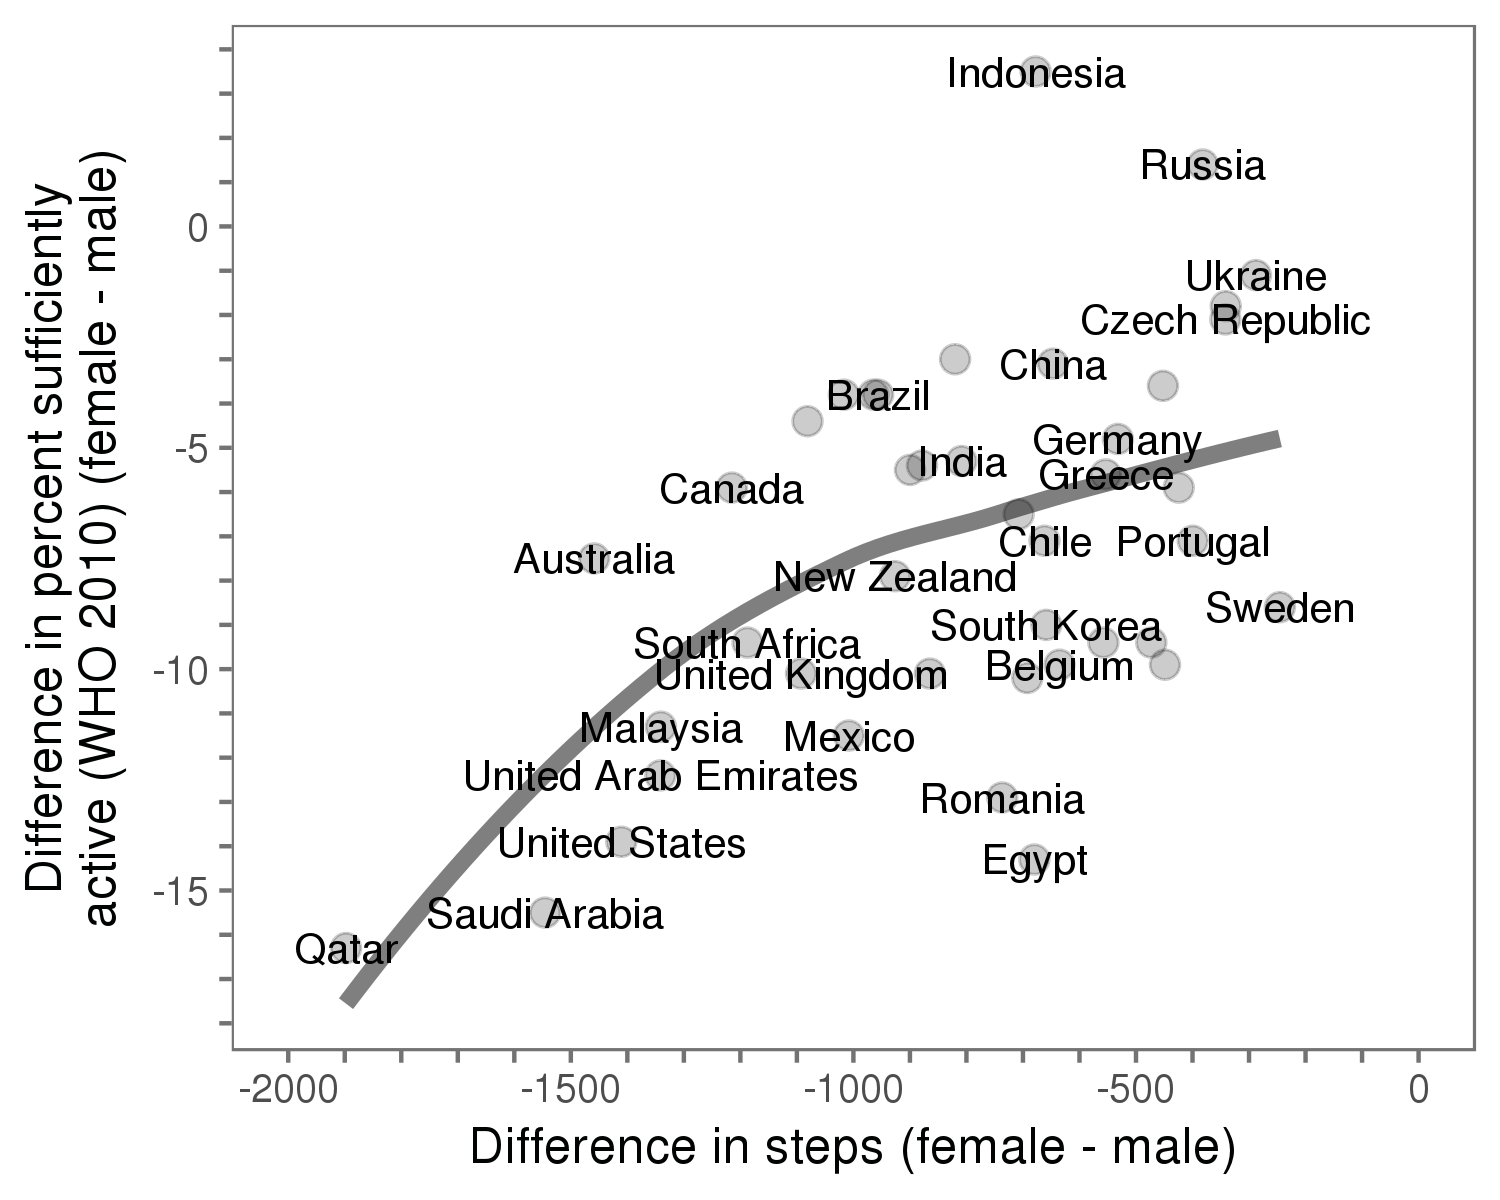

In [4]:
p <- ggplot(df, aes(steps_diff_female_minus_male, diff_suff_active_who2010_female_minus_male, 
                   label=country))
p <- p + geom_smooth(aes(group=1), method="loess",span=1.2,  se = F, size=2.0, color="gray50", alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = TRUE, size=3.5)
p <- p + xlab("Difference in steps (female - male)") + ylab("Difference in percent sufficiently\nactive (WHO 2010) (female - male)")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set1")

# xticks
ticks = seq(-2000,0,by=100) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%d", ticks[seq(1, length(labels), 5)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(-2000,0))
# yticks
ticks = seq(-20,5,by=1) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%.0f", ticks[seq(1, length(labels), 5)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)

p

ggsave(filename="../output/edfig2c.pdf", plot=p, width=4, height=3)

Gender gap in activity estimated from smartphones is strongly correlated with previously reported estimates based on self-report. We find that the difference in average steps per day between females and males is strongly correlated to the difference in the fraction of each gender who report being sufficiently active according to the WHO (Pearson r=0.52, $p < 10^{−3}$).

In [5]:
cor.test(df$steps_diff_female_minus_male, df$diff_suff_active_who2010_female_minus_male)


	Pearson's product-moment correlation

data:  df$steps_diff_female_minus_male and df$diff_suff_active_who2010_female_minus_male
t = 3.8694, df = 40, p-value = 0.0003932
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2590366 0.7127573
sample estimates:
      cor 
0.5218806 
